In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import warnings
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import plotly.express as px
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

warnings.filterwarnings("ignore")
plt.style.use("ggplot")
plt.rcParams.update({"font.size": 14, "axes.labelweight": "bold", "lines.linewidth": 2})

df = pd.read_csv(
    "../../data/processed/ail_price.csv", parse_dates=["date"], index_col="date"
)
df = df.sort_values(by="date")
temp_2023_df =  pd.read_csv(
    "../../data/raw/2023_weather_station.csv", encoding='latin-1', 
)

temp_2022_1_df =  pd.read_csv(
    "../../data/raw/2022_weather_station_1.csv", encoding='latin-1', 
)

temp_2022_2_df =  pd.read_csv(
    "../../data/raw/2022_weather_station_2.csv", encoding='latin-1', 
)

total_gen_df =  pd.read_csv(
    "../../data/raw/gen.csv"
)

total_gen_df.rename(columns={'Date (MST)': 'date'}, inplace=True)

In [3]:
import plotly.express as px
import pandas as pd

# Create violin plot
fig = px.violin(df, x='price', box=True, points='all')

# Update layout
fig.update_layout(
    title='Distribution of Price',
    yaxis_title='Price',
    xaxis_title=''
)

# Show plot
fig.show()


In [4]:
import plotly.express as px
import pandas as pd

# Create violin plot
fig = px.violin(df, x='price', box=True, points='all')

# Update layout
fig.update_layout(
    title='Distribution of Price',
    yaxis_title='Price',
    xaxis_title=''
)


fig.update_layout(xaxis=dict(range=[-10, 150]))

# Show plot
fig.show()


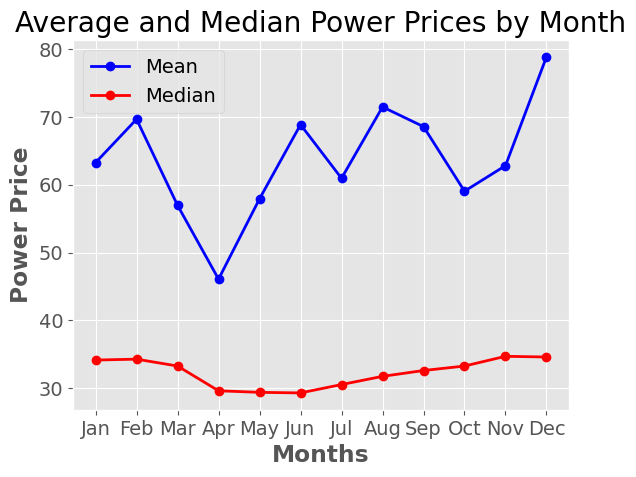

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

data = df
# Calculate the average power price for each month
average_prices = data.groupby(data.index.month)['price'].mean()

# Calculate the median power price for each month
median_prices = data.groupby(data.index.month)['price'].median()

# Extract month names for x-axis labels
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Plotting the average and median power prices for each month side by side
fig, ax = plt.subplots()
ax.plot(months, average_prices, marker='o', color='blue', label='Mean')
ax.plot(months, median_prices, marker='o', color='red', label='Median')

ax.set_xlabel('Months')
ax.set_ylabel('Power Price')
ax.set_title('Average and Median Power Prices by Month')
ax.grid(True)
ax.legend()

plt.show()


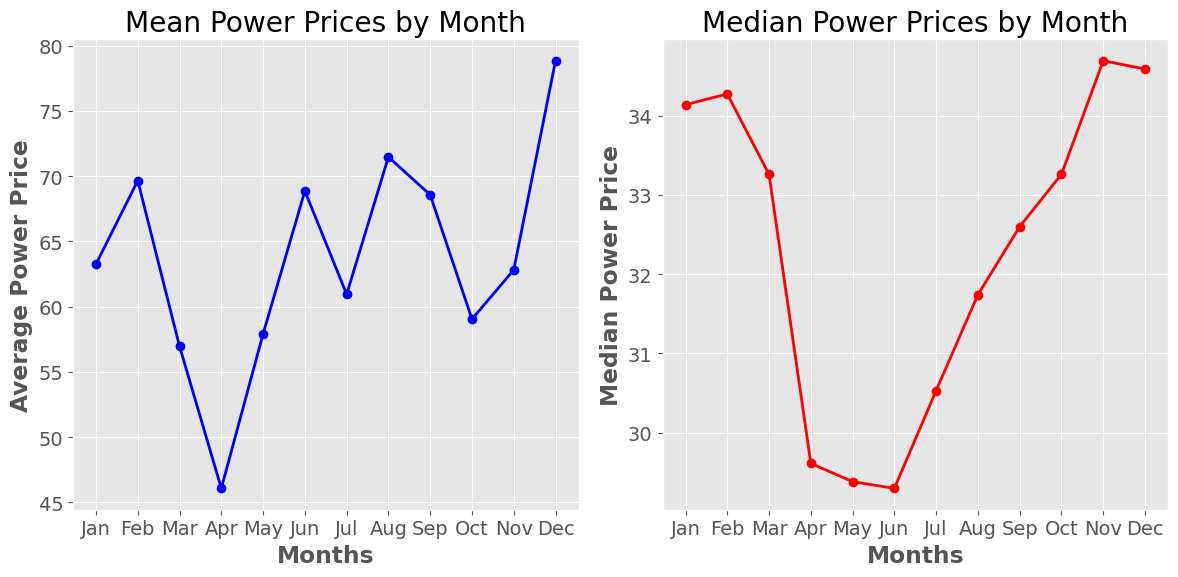

In [6]:


# Calculate the average power price for each month
average_prices = data.groupby(data.index.month)['price'].mean()

# Calculate the median power price for each month
median_prices = data.groupby(data.index.month)['price'].median()

# Extract month names for x-axis labels
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Create subplots with two columns
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Plot the mean power prices
ax1.plot(months, average_prices, marker='o', color='blue')
ax1.set_xlabel('Months')
ax1.set_ylabel('Average Power Price')
ax1.set_title('Mean Power Prices by Month')
ax1.grid(True)

# Plot the median power prices
ax2.plot(months, median_prices, marker='o', color='red')
ax2.set_xlabel('Months')
ax2.set_ylabel('Median Power Price')
ax2.set_title('Median Power Prices by Month')
ax2.grid(True)

plt.tight_layout()
plt.show()


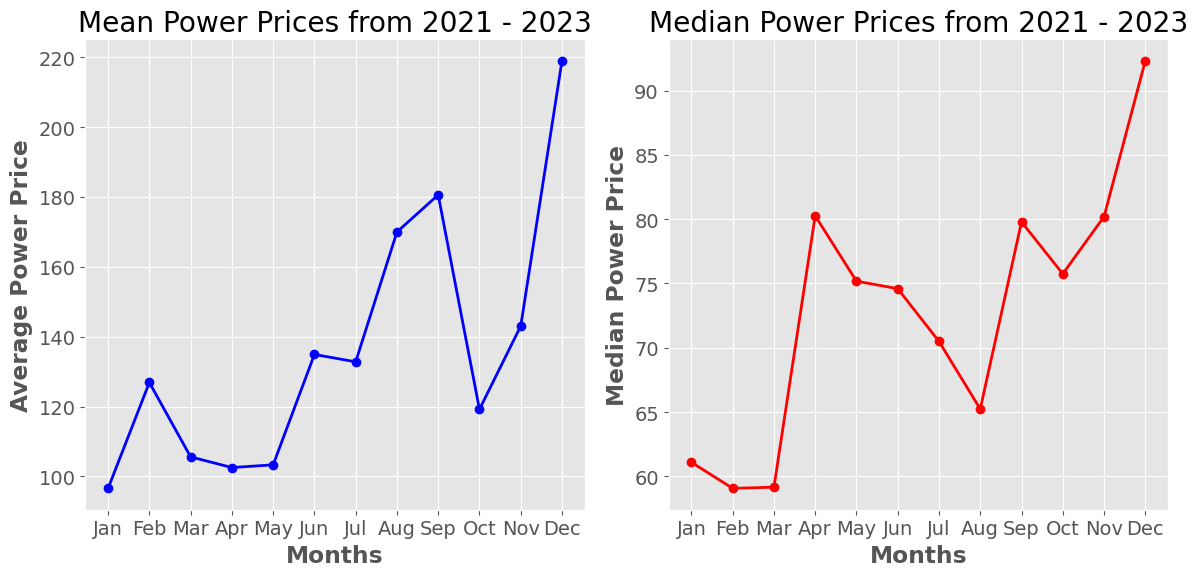

In [7]:
import pandas as pd
import matplotlib.pyplot as plt


# Filter the data for the year 2021
data_2021 = data[data.index.year >= 2021]

# Calculate the average power price for each month in 2021
average_prices = data_2021.groupby(data_2021.index.month)['price'].mean()

# Calculate the median power price for each month in 2021
median_prices = data_2021.groupby(data_2021.index.month)['price'].median()

# Extract month names for x-axis labels
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Create subplots with two columns
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Plot the mean power prices for 2021
ax1.plot(months, average_prices, marker='o', color='blue')
ax1.set_xlabel('Months')
ax1.set_ylabel('Average Power Price')
ax1.set_title('Mean Power Prices from 2021 - 2023')
ax1.grid(True)

# Plot the median power prices for 2021
ax2.plot(months, median_prices, marker='o', color='red')
ax2.set_xlabel('Months')
ax2.set_ylabel('Median Power Price')
ax2.set_title('Median Power Prices from 2021 - 2023')
ax2.grid(True)

plt.tight_layout()
plt.show()


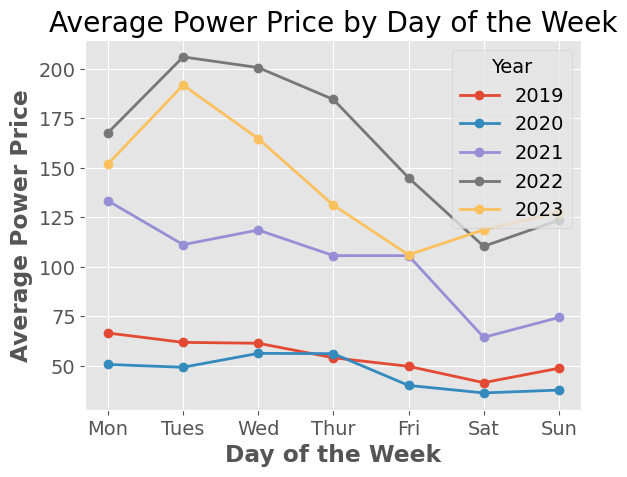

In [8]:
# Filter the data for the year 2022 and beyond
data_gt_2021 = data[data.index.year >= 2019]

# Group the data by year and day of the week, and calculate the average power price
average_prices = data_gt_2021.groupby([data_gt_2021.index.year, data_gt_2021.index.dayofweek])['price'].mean()

# Reshape the data for plotting
average_prices = average_prices.unstack(level=0)

# Define the days of the week
days_of_week = ['Mon', 'Tues', 'Wed', 'Thur', 'Fri', 'Sat', 'Sun']

# Plot the average power price for each day of the week for each year
fig, ax = plt.subplots()
average_prices.plot(ax=ax, marker='o')

ax.set_xticks(range(7))
ax.set_xticklabels(days_of_week)
ax.set_xlabel('Day of the Week')
ax.set_ylabel('Average Power Price')
ax.set_title('Average Power Price by Day of the Week')
ax.grid(True)
ax.legend(title='Year')

plt.show()


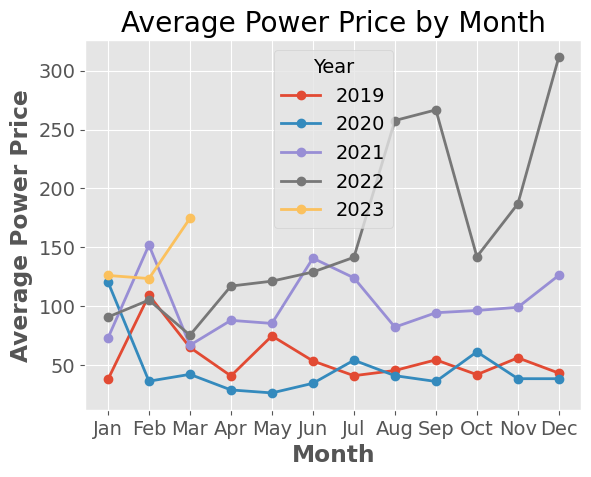

In [9]:
import matplotlib.pyplot as plt

# Filter the data for the year 2022 and beyond
data_gt_2021 = data[data.index.year >= 2019]

# Group the data by year and month, and calculate the average power price
average_prices = data_gt_2021.groupby([data_gt_2021.index.year, data_gt_2021.index.month])['price'].mean()

# Reshape the data for plotting
average_prices = average_prices.unstack(level=0)

# Define the abbreviated month names
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Plot the average power price for each month for each year
fig, ax = plt.subplots()
average_prices.plot(ax=ax, marker='o')

ax.set_xticks(range(1, 13))
ax.set_xticklabels(months)
ax.set_xlabel('Month')
ax.set_ylabel('Average Power Price')
ax.set_title('Average Power Price by Month')
ax.grid(True)
ax.legend(title='Year')

plt.show()


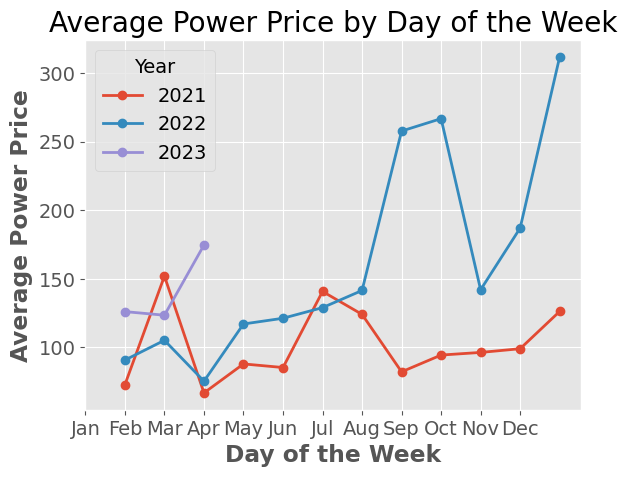

In [10]:
# Filter the data for the year 2022 and beyond
data_gt_2021 = data[data.index.year >= 2021]

# Group the data by year and day of the week, and calculate the average power price
average_prices = data_gt_2021.groupby([data_gt_2021.index.year, data_gt_2021.index.month])['price'].mean()

# Reshape the data for plotting
average_prices = average_prices.unstack(level=0)

# Define the days of the week
month_list = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']


# Plot the average power price for each day of the week for each year
fig, ax = plt.subplots()
average_prices.plot(ax=ax, marker='o')

ax.set_xticks(range(12))
ax.set_xticklabels(month_list)
ax.set_xlabel('Day of the Week')
ax.set_ylabel('Average Power Price')
ax.set_title('Average Power Price by Day of the Week')
ax.grid(True)
ax.legend(title='Year')

plt.show()


In [11]:
data.shape

(72287, 7)

In [12]:
# Filter the data for the year 2021 and beyond
data_gt_2021 = data[data.index.year >= 2021]

# Extract the data for summer (May 1st to October 31st) and winter (November 1st to April 30th)
summer_data = data_gt_2021[(data_gt_2021.index.month >= 5) & (data_gt_2021.index.month <= 10)]
winter_data = data_gt_2021[((data_gt_2021.index.month >= 11) & (data_gt_2021.index.month <= 12)) | ((data_gt_2021.index.month >= 1) & (data_gt_2021.index.month <= 4))]

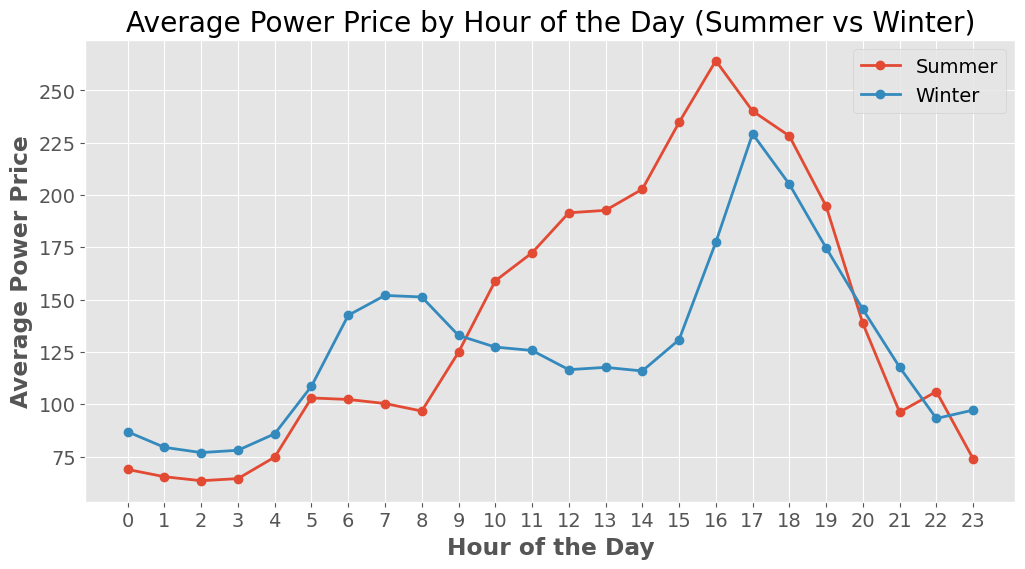

In [13]:
# Calculate the average power price for each hour of the day for summer and winter
average_summer = summer_data.groupby(summer_data.index.hour)['price'].mean()
average_winter = winter_data.groupby(winter_data.index.hour)['price'].mean()

# Plot the average power price for each hour of the day for summer and winter
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(average_summer.index, average_summer, marker='o', label='Summer')
ax.plot(average_winter.index, average_winter, marker='o', label='Winter')

ax.set_xticks(range(24))
ax.set_xlabel('Hour of the Day')
ax.set_ylabel('Average Power Price')
ax.set_title('Average Power Price by Hour of the Day (Summer vs Winter)')
ax.grid(True)
ax.legend()

plt.show()


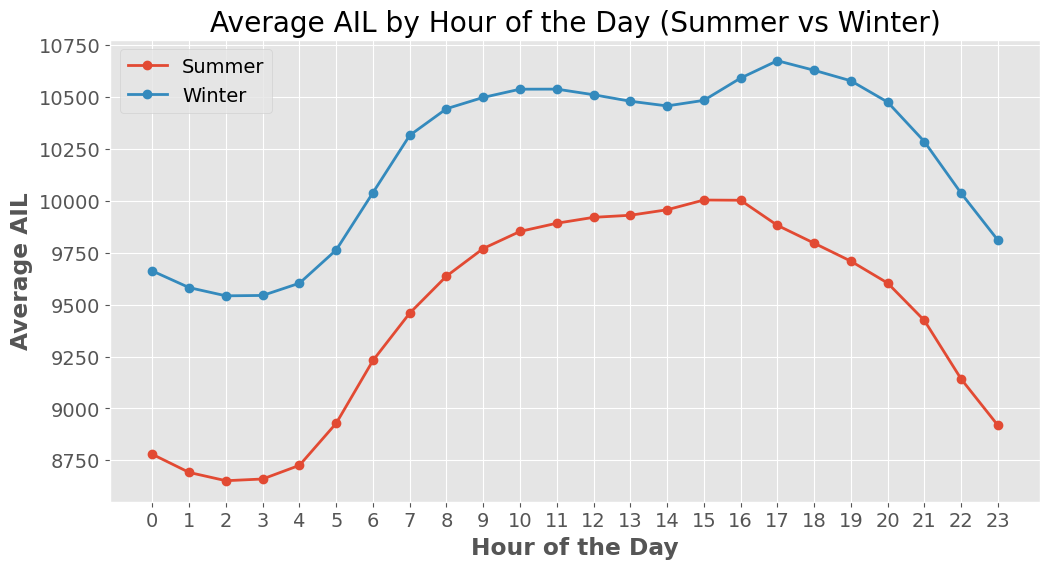

In [14]:
# Filter the data for the year 2021 and beyond
data_gt_2021 = data[data.index.year >= 2021]

# Extract the data for summer (May 1st to October 31st) and winter (November 1st to April 30th)
summer_data = data_gt_2021[(data_gt_2021.index.month >= 5) & (data_gt_2021.index.month <= 10)]
winter_data = data_gt_2021[((data_gt_2021.index.month >= 11) & (data_gt_2021.index.month <= 12)) | ((data_gt_2021.index.month >= 1) & (data_gt_2021.index.month <= 4))]

# Calculate the average power price for each hour of the day for summer and winter
average_summer = summer_data.groupby(summer_data.index.hour)['ail'].mean()
average_winter = winter_data.groupby(winter_data.index.hour)['ail'].mean()

# Plot the average power price for each hour of the day for summer and winter
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(average_summer.index, average_summer, marker='o', label='Summer')
ax.plot(average_winter.index, average_winter, marker='o', label='Winter')

ax.set_xticks(range(24))
ax.set_xlabel('Hour of the Day')
ax.set_ylabel('Average AIL')
ax.set_title('Average AIL by Hour of the Day (Summer vs Winter)')
ax.grid(True)
ax.legend()

plt.show()


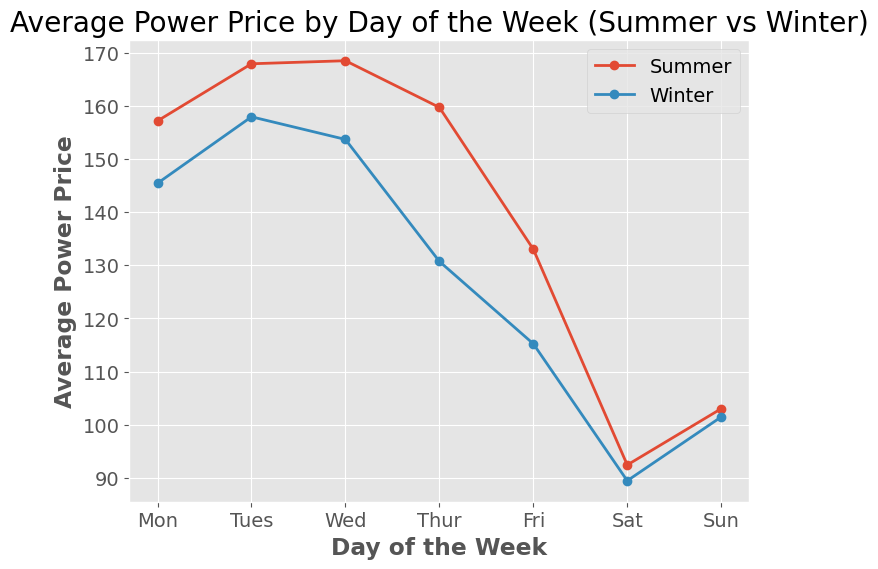

In [15]:

# Filter the data for the year 2021 and beyond
data_gt_2021 = data[data.index.year >= 2021]

# Extract the data for summer (May 1st to October 31st) and winter (November 1st to April 30th)
summer_data = data_gt_2021[(data_gt_2021.index.month >= 5) & (data_gt_2021.index.month <= 10)]
winter_data = data_gt_2021[((data_gt_2021.index.month >= 11) & (data_gt_2021.index.month <= 12)) | ((data_gt_2021.index.month >= 1) & (data_gt_2021.index.month <= 4))]

# Calculate the average power price for each day of the week for summer and winter
average_summer = summer_data.groupby(summer_data.index.dayofweek)['price'].mean()
average_winter = winter_data.groupby(winter_data.index.dayofweek)['price'].mean()

# Define the days of the week
days_of_week = ['Mon', 'Tues', 'Wed', 'Thur', 'Fri', 'Sat', 'Sun']

# Plot the average power price for each day of the week for summer and winter
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(days_of_week, average_summer, marker='o', label='Summer')
ax.plot(days_of_week, average_winter, marker='o', label='Winter')

ax.set_xlabel('Day of the Week')
ax.set_ylabel('Average Power Price')
ax.set_title('Average Power Price by Day of the Week (Summer vs Winter)')
ax.grid(True)
ax.legend()

plt.show()


In [16]:
# Filter the data for the year 2021 and beyond
data_gt_2021 = data[data.index.year >= 2021]

# Calculate the day of the week
data_gt_2021['day_of_week'] = data_gt_2021.index.dayofweek

# Define the days of the week
weekday_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Create the violin plot
fig = go.Figure()

# Add violin plot with box plot inside
fig.add_trace(go.Violin(x=data_gt_2021['day_of_week'], y=data_gt_2021['price'],
                        name='Violin',
                        box_visible=True, meanline_visible=True,
                        width=0.8,
                        box=dict(visible=True),
                        line=dict(color='black')))

# Update the x-axis tick labels
fig.update_layout(xaxis=dict(
    tickmode='array',
    tickvals=list(range(7)),
    ticktext=weekday_names
))


fig.update_layout(yaxis=dict(range=[0, 250]))

# Update the layout
fig.update_layout(title='Distribution of Power Price by Day of the Week',
                  xaxis=dict(title='Day of the Week'),
                  yaxis=dict(title='Power Price'),
                  showlegend=False,
                  height=600)

# Show the plot
fig.show()


In [17]:
# Filter the data for the year 2021 and beyond
data_gt_2021 = data[data.index.year >= 2021]

# Calculate the day of the week
data_gt_2021['day_of_week'] = data_gt_2021.index.dayofweek

# Define the days of the week
weekday_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Create the violin plot
fig = px.violin(data_gt_2021, x='day_of_week', y='price', color='day_of_week',box=True, width=900, height=500,
                category_orders={'day_of_week': weekday_names}, 
                labels={'day_of_week': 'Day of the Week', 'price': 'Power Price'})

# Update the layout
fig.update_layout(title='Distribution of Power Price by Day of the Week',
                  xaxis=dict(title='Day of the Week'),
                  yaxis=dict(title='Power Price'),
                  showlegend=False,
                  height=600)

# Update the x-axis tick labels
fig.update_layout(xaxis=dict(
    tickmode='array',
    tickvals=list(range(7)),
    ticktext=weekday_names
))

# Show the plot
fig.show()


In [18]:
# Filter the data for the years 2021 to 2023
data_2021_2023 = data[(data.index.year >= 2021) & (data.index.year <= 2023)]

summer_data = data_2021_2023[data_2021_2023.index.month.isin(range(5, 11))]

# Filter the data for winter days
winter_data = data_2021_2023[data_2021_2023.index.month.isin([11, 12, 1, 2, 3, 4])]

summer_data.corr('spearman').style.background_gradient()

# CONCLUSION -

Ail % price - 0.4 

In [19]:
winter_data.corr('spearman').style.background_gradient()

In [20]:
temp_2023_df

Station Name Date (Local Standard Time)  Air Temp. Inst. (°C)  \
0           Calgary Intl A      01-January-2023 00:00                  -4.5   
1           Calgary Intl A      01-January-2023 01:00                  -2.5   
2           Calgary Intl A      01-January-2023 02:00                  -3.6   
3           Calgary Intl A      01-January-2023 03:00                  -3.9   
4           Calgary Intl A      01-January-2023 04:00                  -5.8   
...                    ...                        ...                   ...   
23172  Red Deer Regional A          18-May-2023 19:00                   NaN   
23173  Red Deer Regional A          18-May-2023 20:00                   NaN   
23174  Red Deer Regional A          18-May-2023 21:00                   NaN   
23175  Red Deer Regional A          18-May-2023 22:00                   NaN   
23176  Red Deer Regional A          18-May-2023 23:00                   NaN   

      Air Temp. Inst. Source Flag Air Temp. Inst. Comment  \
0                          ACTUAL                     NaN   
1                          ACTUAL                     NaN   
2                          ACTUAL                     NaN   
3                          ACTUAL                     NaN   
4                          ACTUAL                     NaN   
...                           ...                     ...   
23172                  UNAVAILBLE                     NaN   
23173                  UNAVAILBLE                     NaN   
23174                  UNAVAILBLE                     NaN   
23175                  UNAVAILBLE                     NaN   
23176                  UNAVAILBLE                     NaN   

       Air Temp. Min. (°C) Air Temp. Min. Source Flag Air Temp. Min. Comment  \
0                     -4.7                     ACTUAL                    NaN   
1                     -4.8                     ACTUAL                    NaN   
2                     -4.5                     ACTUAL                    NaN   
3                     -4.8                     ACTUAL                    NaN   
4                     -6.0                     ACTUAL                    NaN   
...                    ...                        ...                    ...   
23172                  NaN                 UNAVAILBLE                    NaN   
23173                  NaN                 UNAVAILBLE                    NaN   
23174                  NaN                 UNAVAILBLE                    NaN   
23175                  NaN                 UNAVAILBLE                    NaN   
23176                  NaN                 UNAVAILBLE                    NaN   

       Air Temp. Max. (°C) Air Temp. Max. Source Flag  ...  \
0                     -2.4                     ACTUAL  ...   
1                     -2.1                     ACTUAL  ...   
2                     -2.2                     ACTUAL  ...   
3                     -2.6                     ACTUAL  ...   
4                     -3.1                     ACTUAL  ...   
...                    ...                        ...  ...   
23172                  NaN                 UNAVAILBLE  ...   
23173                  NaN                 UNAVAILBLE  ...   
23174                  NaN                 UNAVAILBLE  ...   
23175                  NaN                 UNAVAILBLE  ...   
23176                  NaN                 UNAVAILBLE  ...   

                           Wind Speed 10 m Syno. Comment  \
0      IDW I.R.: power=2, radius=60.0, stations=8, ne...   
1      IDW I.R.: power=2, radius=60.0, stations=8, ne...   
2                                                    NaN   
3                   linear interpolation: point=1, gap=2   
4                   linear interpolation: point=2, gap=2   
...                                                  ...   
23172                                                NaN   
23173                                                NaN   
23174                                                NaN   
23175                     

In [36]:
all_df = pd.concat([temp_2022_1_df, temp_2022_2_df, temp_2023_df])


all_df.rename(columns={'Date (Local Standard Time)': 'date', 'Air Temp. Inst. (°C)' : 'temp',
                             'Air Temp. Min. (°C)' : 'min_temp',
                             'Air Temp. Max. (°C)' : 'max_temp' ,
                             'Wind Speed 10 m Syno. (km/h)' : 'wind_speed' ,
                            }, inplace=True)

all_df.head(1)


Station Name                   date  temp Air Temp. Inst. Source Flag  \
0  Calgary Intl A  01-January-2022 00:00 -24.8                      ACTUAL   

  Air Temp. Inst. Comment  min_temp Air Temp. Min. Source Flag  \
0                     NaN     -24.8                     ACTUAL   

  Air Temp. Min. Comment  max_temp Air Temp. Max. Source Flag  ...  \
0                    NaN     -23.3                     ACTUAL  ...   

                       Wind Speed 10 m Syno. Comment  \
0  IDW I.R.: power=2, radius=60.0, stations=8, ne...   

   Wind Dir. 10 m Syno. (°) Wind Dir. 10 m Syno. Source Flag  \
0                       NaN                          MISSING   

  Wind Dir. 10 m Syno. Comment  Wind Speed 10 m Avg. (km/h)  \
0                          NaN                          NaN   

  Wind Speed 10 m Avg. Source Flag Wind Speed 10 m Avg. Comment  \
0                              NaN                          NaN   

   Wind Dir. 10 m Avg. (°) Wind Dir. 10 m Avg. Source Flag  \
0                      NaN                             NaN   

   Wind Dir. 10 m Avg. Comment  
0                          NaN  

[1 rows x 26 columns]

In [37]:
# all_df = all_df.loc[:, ['Station Name', 'date', 'temp', 'min_temp', 'max_temp', 'wind_speed']]
all_df['date'] = pd.to_datetime(all_df['date'], format='%d-%B-%Y %H:%M')
temp_2022_df = all_df.pivot(index='date', columns='Station Name', values=['temp', 'wind_speed'])
temp_2022_df.columns = temp_2022_df.columns.map('{0[1]}_{0[0]}'.format)
temp_2022_df = temp_2022_df.iloc[:-8]

In [38]:
temp_df = temp_2022_df
temp_df.head(2)

Calgary Intl A_temp  Edmonton Blatchford_temp  \
date                                                                 
2022-01-01 00:00:00                -24.8                     -28.1   
2022-01-01 01:00:00                -24.3                     -28.2   

                     Fort Mcmurray A_temp  Grande Prairie A_temp  \
date                                                               
2022-01-01 00:00:00                 -32.1                  -33.4   
2022-01-01 01:00:00                 -31.7                  -31.7   

                     Medicine Hat_temp  Peace River A_temp  \
date                                                         
2022-01-01 00:00:00              -30.5               -31.9   
2022-01-01 01:00:00              -28.9               -31.5   

                     Red Deer Regional A_temp  Calgary Intl A_wind_speed  \
date                                                                       
2022-01-01 00:00:00                     -30.6                       15.0   
2022-01-01 01:00:00                     -29.9                       13.1   

                     Edmonton Blatchford_wind_speed  \
date                                                  
2022-01-01 00:00:00                             3.3   
2022-01-01 01:00:00                             4.2   

                     Fort Mcmurray A_wind_speed  Grande Prairie A_wind_speed  \
date                                                                           
2022-01-01 00:00:00                         3.6                          5.0   
2022-01-01 01:00:00                         3.6                          3.7   

                     Medicine Hat_wind_speed  Peace River A_wind_speed  \
date                                                                     
2022-01-01 00:00:00                      7.6                       6.5   
2022-01-01 01:00:00                      5.4                       7.6   

                     Red Deer Regional A_wind_speed  
date                                                 
2022-01-01 00:00:00                             7.6  
2022-01-01 01:00:00                             7.6

In [39]:
# temp_2023_df.rename(columns={'Date (Local Standard Time)': 'date', 'Air Temp. Inst. (°C)' : 'temp',
#                              'Air Temp. Min. (°C)' : 'min_temp',
#                              'Air Temp. Max. (°C)' : 'max_temp' ,
#                              'Wind Speed 10 m Syno. (km/h)' : 'wind_speed' ,
#                             }, inplace=True)
# temp_2023_df = temp_2023_df.loc[:, ['Station Name', 'date', 'temp', 'min_temp', 'max_temp', 'wind_speed']]
# temp_2023_df.reset_index()
# temp_2023_df['date'] = pd.to_datetime(temp_2023_df['date'], format='%d-%B-%Y %H:%M')
# temp = temp_2023_df.pivot(index='date', columns='Station Name', values='temp')
# temp = temp.sort_values(by="date")
# temp.tail(40)
# temp = temp.iloc[:-8]
# temp_2023_df.head()

In [40]:
temp_df.shape

(12062, 14)

In [41]:
df = df.loc[:, [ 'price', 'ail']]
df.head()

price   ail
date                            
2015-01-01 00:00:00  37.45  9210
2015-01-01 01:00:00  34.62  9045
2015-01-01 02:00:00  22.80  8839
2015-01-01 03:00:00  21.05  8742
2015-01-01 04:00:00  20.79  8699

In [56]:
temp_columns_new

Calgary Intl A_temp  Edmonton Blatchford_temp  \
date                                                                 
2022-01-01 00:00:00                -24.8                     -28.1   
2022-01-01 01:00:00                -24.3                     -28.2   
2022-01-01 02:00:00                -25.2                     -28.4   
2022-01-01 03:00:00                -24.2                     -28.5   
2022-01-01 04:00:00                -24.1                     -28.0   
...                                  ...                       ...   
2023-05-18 11:00:00                 15.2                      13.6   
2023-05-18 12:00:00                 16.6                      15.0   
2023-05-18 13:00:00                 18.0                      16.0   
2023-05-18 14:00:00                 19.2                      17.4   
2023-05-18 15:00:00                 20.4                      18.7   

                     Fort Mcmurray A_temp  Grande Prairie A_temp  \
date                                                               
2022-01-01 00:00:00                 -32.1                  -33.4   
2022-01-01 01:00:00                 -31.7                  -31.7   
2022-01-01 02:00:00                 -31.9                  -31.0   
2022-01-01 03:00:00                 -31.1                  -28.9   
2022-01-01 04:00:00                 -31.8                  -27.2   
...                                   ...                    ...   
2023-05-18 11:00:00                  15.5                   14.9   
2023-05-18 12:00:00                  17.3                   17.5   
2023-05-18 13:00:00                  18.3                   19.5   
2023-05-18 14:00:00                  19.5                   21.2   
2023-05-18 15:00:00                  20.3                   22.6   

                     Medicine Hat_temp  Peace River A_temp  \
date                                                         
2022-01-01 00:00:00              -30.5               -31.9   
2022-01-01 01:00:00              -28.9               -31.5   
2022-01-01 02:00:00              -26.6               -28.6   
2022-01-01 03:00:00              -25.8               -28.5   
2022-01-01 04:00:00              -26.9               -26.6   
...                                ...                 ...   
2023-05-18 11:00:00               11.8                18.0   
2023-05-18 12:00:00               13.7                19.9   
2023-05-18 13:00:00               13.5                21.9   
2023-05-18 14:00:00               14.5                21.8   
2023-05-18 15:00:00               14.4                22.6   

                     Red Deer Regional A_temp  
date                                           
2022-01-01 00:00:00                     -30.6  
2022-01-01 01:00:00                     -29.9  
2022-01-01 02:00:00                     -30.8  
2022-01-01 03:00:00                     -29.5  
2022-01-01 04:00:00                     -30.0  
...                                       ...  
2023-05-18 11:00:00                      14.1  
2023-05-18 12:00:00                      16.1  
2023-05-18 13:00:00                      17.6  
2023-05-18 14:00:00                      18.4  
2023-05-18 15:00:00                      19.3  

[12062 rows x 7 columns]

In [58]:
temp_columns_new = temp_df.filter(like='temp')
temp_df['avg_temp'] = temp_columns_new.mean(axis=1)
temp_df = temp_df[['avg_temp']]

temp_df.to_csv('./temp.csv')

In [42]:
merged_df = pd.merge(df, temp_df, on='date')
merged_df
temp_columns = merged_df.filter(like='temp')
wind_columns = merged_df.filter(like='wind')
avg_df = merged_df
avg_df['avg_temp'] = temp_columns.mean(axis=1)
avg_df['avg_windspeed'] = wind_columns.mean(axis=1)
avg_df.head(1)

price    ail  Calgary Intl A_temp  Edmonton Blatchford_temp  \
date                                                                      
2022-01-01  65.64  10746                -24.8                     -28.1   

            Fort Mcmurray A_temp  Grande Prairie A_temp  Medicine Hat_temp  \
date                                                                         
2022-01-01                 -32.1                  -33.4              -30.5   

            Peace River A_temp  Red Deer Regional A_temp  \
date                                                       
2022-01-01               -31.9                     -30.6   

            Calgary Intl A_wind_speed  Edmonton Blatchford_wind_speed  \
date                                                                    
2022-01-01                       15.0                             3.3   

            Fort Mcmurray A_wind_speed  Grande Prairie A_wind_speed  \
date                                                                  
2022-01-01                         3.6                          5.0   

            Medicine Hat_wind_speed  Peace River A_wind_speed  \
date                                                            
2022-01-01                      7.6                       6.5   

            Red Deer Regional A_wind_speed  avg_temp  avg_windspeed  
date                                                                 
2022-01-01                             7.6     -30.2       6.942857

In [43]:
merged_df[merged_df.isna().any(axis=1)]

price   ail  Calgary Intl A_temp  \
date                                                    
2022-11-06 01:00:00  48.54  9617                -11.3   

                     Edmonton Blatchford_temp  Fort Mcmurray A_temp  \
date                                                                  
2022-11-06 01:00:00                       NaN                 -11.9   

                     Grande Prairie A_temp  Medicine Hat_temp  \
date                                                            
2022-11-06 01:00:00                  -14.5               -8.3   

                     Peace River A_temp  Red Deer Regional A_temp  \
date                                                                
2022-11-06 01:00:00               -13.6                       NaN   

                     Calgary Intl A_wind_speed  \
date                                             
2022-11-06 01:00:00                       23.1   

                     Edmonton Blatchford_wind_speed  \
date                                                  
2022-11-06 01:00:00                            15.9   

                     Fort Mcmurray A_wind_speed  Grande Prairie A_wind_speed  \
date                                                                           
2022-11-06 01:00:00                        14.8                          6.3   

                     Medicine Hat_wind_speed  Peace River A_wind_speed  \
date                                                                     
2022-11-06 01:00:00                     25.9                      22.2   

                     Red Deer Regional A_wind_speed  avg_temp  avg_windspeed  
date                                                                          
2022-11-06 01:00:00                            20.5    -11.92      18.385714

In [44]:
avg_temp = merged_df['Edmonton Blatchford_temp'].mean()
avg_red = merged_df['Red Deer Regional A_temp'].mean()

# Replace NaN values with the average
merged_df['Edmonton Blatchford_temp'].fillna(avg_temp, inplace=True)
merged_df['Red Deer Regional A_temp'].fillna(avg_red, inplace=True)

merged_df[merged_df.isna().any(axis=1)]

Empty DataFrame
Columns: [price, ail, Calgary Intl A_temp, Edmonton Blatchford_temp, Fort Mcmurray A_temp, Grande Prairie A_temp, Medicine Hat_temp, Peace River A_temp, Red Deer Regional A_temp, Calgary Intl A_wind_speed, Edmonton Blatchford_wind_speed, Fort Mcmurray A_wind_speed, Grande Prairie A_wind_speed, Medicine Hat_wind_speed, Peace River A_wind_speed, Red Deer Regional A_wind_speed, avg_temp, avg_windspeed]
Index: []

In [45]:
df_2023 = df.reset_index()
df_2023 = df_2023[df_2023['date'].dt.year == 2023]
df_2023.shape
df_2023
df_2023 = df_2023.loc[:, [ 'date', 'price', 'ail']]
df_2023

date  price    ail
70128 2023-01-01 00:00:00  80.55   9824
70129 2023-01-01 01:00:00  80.84   9712
70130 2023-01-01 02:00:00  80.63   9623
70131 2023-01-01 03:00:00  79.76   9578
70132 2023-01-01 04:00:00  79.53   9599
...                   ...    ...    ...
72282 2023-03-31 18:00:00  50.86  10016
72283 2023-03-31 19:00:00  49.35  10121
72284 2023-03-31 20:00:00  51.28  10075
72285 2023-03-31 21:00:00  48.39   9870
72286 2023-03-31 22:00:00  46.38   9635

[2159 rows x 3 columns]

In [46]:
temp_df_2023 = temp_df.reset_index()
temp_df_2023 = temp_df_2023[temp_df_2023['date'].dt.year == 2023]
temp_df_2023.shape

temp_df_2023 = temp_df_2023.set_index('date')
df_2023 = df_2023.set_index('date')

In [47]:
merged_2023_df = pd.merge(df_2023, temp_df_2023, on='date')
merged_2023_df
temp_columns = merged_2023_df.filter(like='temp')
temp_columns
avg_2023_df = merged_2023_df
avg_2023_df['avg_temp'] = temp_columns.mean(axis=1)
avg_2023_df

avg_clean_2023_df = avg_2023_df[['avg_temp']]
avg_clean_2023_df

avg_temp
date                          
2023-01-01 00:00:00 -11.557143
2023-01-01 01:00:00 -11.142857
2023-01-01 02:00:00 -10.714286
2023-01-01 03:00:00 -10.442857
2023-01-01 04:00:00 -10.957143
...                        ...
2023-03-31 18:00:00   4.085714
2023-03-31 19:00:00   2.728571
2023-03-31 20:00:00   1.485714
2023-03-31 21:00:00   0.742857
2023-03-31 22:00:00   0.328571

[2158 rows x 1 columns]

In [48]:
avg_clean_2023_df = avg_clean_2023_df.reset_index()

avg_clean_2023_df['date'] = pd.to_datetime(avg_clean_2023_df['date'])
total_gen_df['date'] = pd.to_datetime(total_gen_df['date'])

final_df = pd.merge(total_gen_df, avg_clean_2023_df, on='date')
final_df

date hourly_profile  season    ail  gas_price  price  \
0    2023-01-01 00:00:00       OFF PEAK  WINTER   9824       4.12  80.55   
1    2023-01-01 01:00:00       OFF PEAK  WINTER   9712       4.12  80.84   
2    2023-01-01 02:00:00       OFF PEAK  WINTER   9623       4.12  80.63   
3    2023-01-01 03:00:00       OFF PEAK  WINTER   9578       4.12  79.76   
4    2023-01-01 04:00:00       OFF PEAK  WINTER   9599       4.12  79.53   
...                  ...            ...     ...    ...        ...    ...   
2153 2023-03-31 18:00:00        ON PEAK  WINTER  10016       2.70  50.86   
2154 2023-03-31 19:00:00        ON PEAK  WINTER  10121       2.70  49.35   
2155 2023-03-31 20:00:00        ON PEAK  WINTER  10075       2.70  51.28   
2156 2023-03-31 21:00:00        ON PEAK  WINTER   9870       2.70  48.39   
2157 2023-03-31 22:00:00       OFF PEAK  WINTER   9635       2.70  46.38   

      spark_spread        Coal  Cogeneration  Combined Cycle   Dual Fuel  \
0            49.65  817.176320   4255.465357     1193.036704  464.670162   
1            49.94  817.141767   4261.072698     1197.092528  464.099606   
2            49.73  816.632098   4247.347130     1197.093206  464.155770   
3            48.86  817.109768   4270.960422     1196.551349  464.372050   
4            48.63  816.817543   4283.723270     1203.868597  463.750606   
...            ...         ...           ...             ...         ...   
2153         30.61  796.834710   4113.225409     1448.101658  464.515104   
2154         29.10  799.950653   4126.405787     1446.552360  464.490216   
2155         31.03  799.049432   4137.788371     1433.685089  464.941161   
2156         28.14  786.506487   4147.858919     1406.180601  464.737160   
2157         26.13  750.835599   4144.000132     1179.727114  464.859327   

      Gas Fired Steam       Hydro       Other  Simple Cycle      Solar  \
0         1755.831809  116.953446  267.786755    413.689317   0.000000   
1         1813.978326  114.114128  264.404739    416.074759   0.000000   
2         1734.996571  121.666094  263.004401    418.430001   0.000000   
3         1656.124253  113.459167  264.462480    413.568644   0.000000   
4         1654.647898  139.900810  263.254258    412.753580   0.000000   
...               ...         ...         ...           ...        ...   
2153       939.398119  155.701659  243.793076    206.735092  81.435101   
2154       898.434651  153.475528  247.167765    207.549602   0.409488   
2155       999.126047  126.500361  254.099587    207.669013   0.409488   
2156       898.324827  118.787565  246.738770    205.440238   0.012967   
2157       891.750557  141.211630  243.860350    198.950719   0.000000   

       Storage         Wind   avg_temp  
0     0.000000   780.206753 -11.557143  
1     0.000000   732.207446 -11.142857  
2     0.000000   743.884060 -10.714286  
3     0.000000   759.293766 -10.442857  
4     0.000000   746.124896 -10.957143  
...        ...          ...        ...  
2153 -3.034280  2158.922025   4.085714  
2154 -3.027391  2261.328306   2.728571  
2155 -3.024113  2256.231668   1.485714  
2156 -2.441446  2280.319041   0.742857  
2157  0.000000  2303.713840   0.328571  

[2158 rows x 19 columns]

## AIL, Price and weather 

- More correlation of avg temperature with AIL than the price 
- DATA : 2022 - 2023

In [49]:
avg_df[['price', 'ail', 'avg_temp']].corr(method='spearman').style.background_gradient(cmap='coolwarm')

- More correlation of avg temperature with price than the AIL (Less data)
- DATA : 2023

In [ ]:
avg_2023_df[['price', 'ail', 'avg_temp']].corr(method='spearman').style.background_gradient(cmap='coolwarm')

In [ ]:
# Create the interaction feature by multiplying internal load and temperature
avg_2023_df['ail*temp'] = avg_2023_df['ail'] * avg_2023_df['avg_temp']

correlation_matrix = avg_2023_df[['price', 'ail', 'avg_temp', 'ail*temp']].corr('spearman').style.background_gradient()
correlation_matrix

In [ ]:
final_df.mean()

ail                10353.698332
gas_price              3.106910
price                142.038211
spark_spread         118.736386
Coal                 783.311190
Cogeneration        4312.143167
Combined Cycle      1370.023667
Dual Fuel            462.407424
Gas Fired Steam     1383.135307
Hydro                136.719908
Other                254.039314
Simple Cycle         348.104476
Solar                178.607887
Storage               -0.275048
Wind                1114.456627
avg_temp              -7.926129
dtype: float64

In [ ]:
final_2022_df = pd.merge(total_gen_df, avg_df, on='date')

In [51]:
avg_df

price    ail  Calgary Intl A_temp  \
date                                                     
2022-01-01 00:00:00  65.64  10746                -24.8   
2022-01-01 01:00:00  61.59  10618                -24.3   
2022-01-01 02:00:00  56.67  10499                -25.2   
2022-01-01 03:00:00  45.58  10451                -24.2   
2022-01-01 04:00:00  57.39  10408                -24.1   
...                    ...    ...                  ...   
2023-03-31 18:00:00  50.86  10016                  8.6   
2023-03-31 19:00:00  49.35  10121                  6.5   
2023-03-31 20:00:00  51.28  10075                  5.4   
2023-03-31 21:00:00  48.39   9870                  4.6   
2023-03-31 22:00:00  46.38   9635                  4.5   

                     Edmonton Blatchford_temp  Fort Mcmurray A_temp  \
date                                                                  
2022-01-01 00:00:00                     -28.1                 -32.1   
2022-01-01 01:00:00                     -28.2                 -31.7   
2022-01-01 02:00:00                     -28.4                 -31.9   
2022-01-01 03:00:00                     -28.5                 -31.1   
2022-01-01 04:00:00                     -28.0                 -31.8   
...                                       ...                   ...   
2023-03-31 18:00:00                       4.1                   1.5   
2023-03-31 19:00:00                       1.4                   0.3   
2023-03-31 20:00:00                       0.2                  -0.6   
2023-03-31 21:00:00                      -0.7                  -1.4   
2023-03-31 22:00:00                      -1.4                  -2.0   

                     Grande Prairie A_temp  Medicine Hat_temp  \
date                                                            
2022-01-01 00:00:00                  -33.4              -30.5   
2022-01-01 01:00:00                  -31.7              -28.9   
2022-01-01 02:00:00                  -31.0              -26.6   
2022-01-01 03:00:00                  -28.9              -25.8   
2022-01-01 04:00:00                  -27.2              -26.9   
...                                    ...                ...   
2023-03-31 18:00:00                    3.1                6.8   
2023-03-31 19:00:00                    4.3                4.0   
2023-03-31 20:00:00                    2.2                2.3   
2023-03-31 21:00:00                    0.9                2.6   
2023-03-31 22:00:00                    2.8                1.9   

                     Peace River A_temp  Red Deer Regional A_temp  \
date                                                                
2022-01-01 00:00:00               -31.9                     -30.6   
2022-01-01 01:00:00               -31.5                     -29.9   
2022-01-01 02:00:00               -28.6                     -30.8   
2022-01-01 03:00:00               -28.5                     -29.5   
2022-01-01 04:00:00               -26.6                     -30.0   
...                                 ...                       ...   
2023-03-31 18:00:00                 2.9                       1.6   
2023-03-31 19:00:00                 3.5                      -0.9   
2023-03-31 20:00:00                 2.1                      -1.2   
2023-03-31 21:00:00                 1.5                      -2.3   
2023-03-31 22:00:00                -0.4                      -3.1   

                     Calgary Intl A_wind_speed  \
date                                             
2022-01-01 00:00:00                       15.0   
2022-01-01 01:00:00                       13.1   
2022-01-01 02:00:00                       13.7   
2022-01-01 03:00:00                       12.4   
2022-01-01 04:00:00                       11.0   
...                                        ...   
2023-03-31 18:00:00                       21.8   
2023-03-31 19:00:00                       18.5   
2023-03-31 20:00:00                       15.1   
2023-03-31 21:00:00                       12.3  

In [ ]:
final_2022_df[['price_x', 'ail_x', 'avg_temp']].corr(method='spearman').style.background_gradient(cmap='coolwarm')

In [ ]:
final_2022_df.columns

Index(['date', 'hourly_profile', 'season', 'ail_x', 'gas_price', 'price_x',
       'spark_spread', 'Coal', 'Cogeneration', 'Combined Cycle', 'Dual Fuel',
       'Gas Fired Steam', 'Hydro', 'Other', 'Simple Cycle', 'Solar', 'Storage',
       'Wind', 'price_y', 'ail_y', 'Calgary Intl A_temp',
       'Edmonton Blatchford_temp', 'Fort Mcmurray A_temp',
       'Grande Prairie A_temp', 'Medicine Hat_temp', 'Peace River A_temp',
       'Red Deer Regional A_temp', 'Calgary Intl A_wind_speed',
       'Edmonton Blatchford_wind_speed', 'Fort Mcmurray A_wind_speed',
       'Grande Prairie A_wind_speed', 'Medicine Hat_wind_speed',
       'Peace River A_wind_speed', 'Red Deer Regional A_wind_speed',
       'avg_temp', 'avg_windspeed'],
      dtype='object')

In [ ]:
final_2022_df.mean()

final_2022_df['total_gensum'] = final_2022_df[['Coal', 'Cogeneration', 'Combined Cycle', 'Dual Fuel', 'Gas Fired Steam', 'Hydro', 'Other', 'Simple Cycle', 'Solar', 'Storage', 'Wind' ]].sum(axis=1)

In [ ]:
from statsmodels.tsa.seasonal import STL

In [ ]:
decomposition = STL(final_2022_df['price_x'], period=24, seasonal=len(final_2022_df)).fit()
final_2022_df['seasonality'] = decomposition.seasonal
final_2022_df['residual'] = decomposition.resid
final_2022_df['trend'] = decomposition.trend

In [ ]:
final_2022_df[['price_x', 'ail_x', 'avg_temp', 'seasonality', 'residual', 'trend', 'total_gensum']].corr(method='spearman').style.background_gradient(cmap='coolwarm')

In [ ]:
final_2022_df.mean()
final_2022_df.to_csv('../../data/processed/final_2022_df.csv', index_label='date')

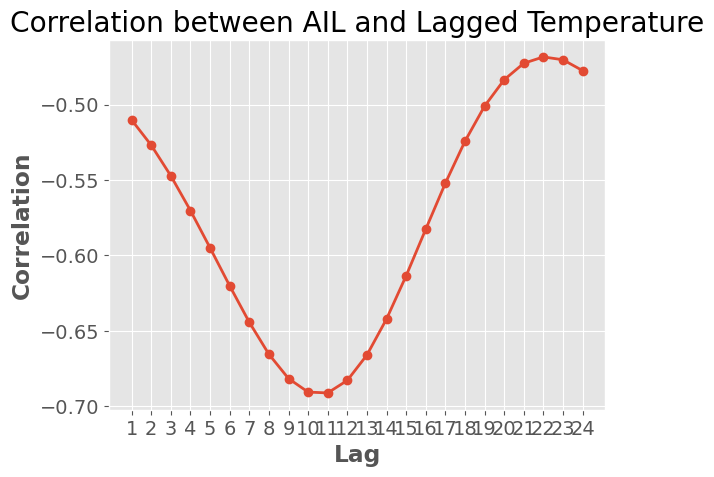

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import spearmanr

val = 25
# Create lagged temperature columns
for i in range(1, val):
    final_2022_df[f'temp_lag_{i}'] = final_2022_df['avg_temp'].shift(i)

# Calculate correlation with different lags
correlations = []
for i in range(1, val):
    corr = final_2022_df['ail_x'].corr(final_2022_df[f'temp_lag_{i}'], method='spearman')
    correlations.append(corr)
    
# Plot correlations
plt.plot(range(1, val), correlations, marker='o')
plt.title('Correlation between AIL and Lagged Temperature')
plt.xlabel('Lag')
plt.ylabel('Correlation')
plt.xticks(range(1, val))
plt.show()

In [ ]:
final_2022_df[['ail_x', 'temp_lag_11']].corr(method='spearman').style.background_gradient()

In [ ]:
summer_df = pd.merge(summer_data, final_2022_df, on='date')
summer_df[['date', 'price', 'ail', 'avg_temp',
       'total_gensum', 'seasonality', 'residual', 'trend']].corr('spearman').style.background_gradient()

In [ ]:
winter_df = pd.merge(winter_data, final_2022_df, on='date')
winter_df[['date', 'price', 'ail', 'avg_temp',
       'total_gensum', 'seasonality', 'residual', 'trend']].corr('spearman').style.background_gradient()

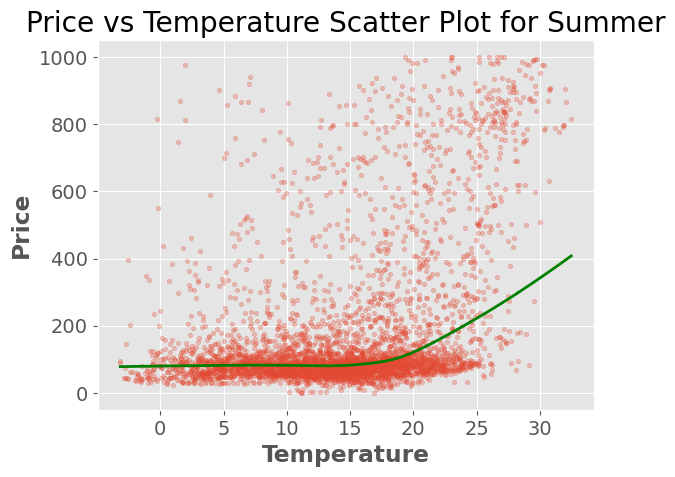

In [ ]:
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Create scatter plot
plt.scatter(summer_df['avg_temp'], summer_df['price'], alpha=0.3, s=10)

# Add axis labels and title
plt.xlabel('Temperature')
plt.ylabel('Price')
plt.title('Price vs Temperature Scatter Plot for Summer')
lowess = sm.nonparametric.lowess(summer_df['price'], summer_df['avg_temp'])
plt.plot(lowess[:, 0], lowess[:, 1], color='green')

# Show plot
plt.show()


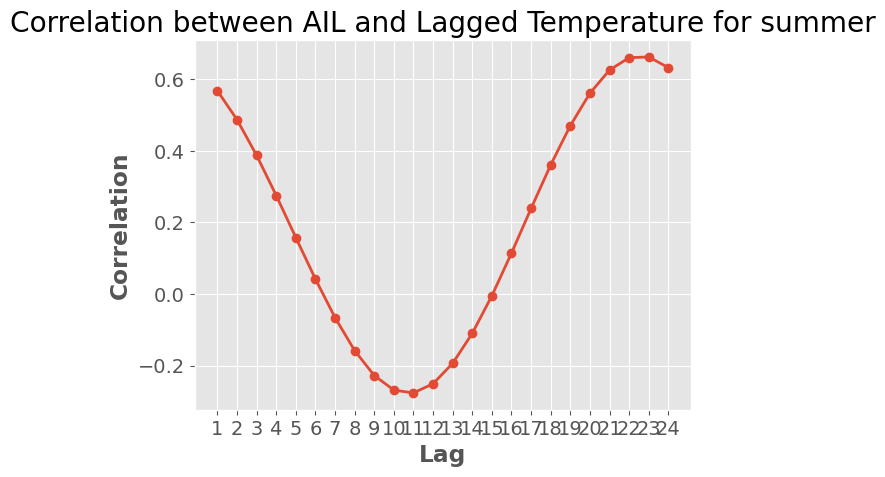

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import spearmanr

val = 25
new_sum_df = summer_df
# Create lagged temperature columns
for i in range(1, val):
    new_sum_df[f'temp_lag_{i}'] = new_sum_df['avg_temp'].shift(i)

# Calculate correlation with different lags
correlations = []
for i in range(1, val):
    corr = new_sum_df['ail_x'].corr(new_sum_df[f'temp_lag_{i}'], method='spearman')
    correlations.append(corr)
    
# Plot correlations
plt.plot(range(1, val), correlations, marker='o')
plt.title('Correlation between AIL and Lagged Temperature for summer')
plt.xlabel('Lag')
plt.ylabel('Correlation')
plt.xticks(range(1, val))
plt.show()

In [ ]:
new_sum_df[['ail_x', 'avg_temp', 'temp_lag_1', 'price']].corr(method='spearman').style.background_gradient()

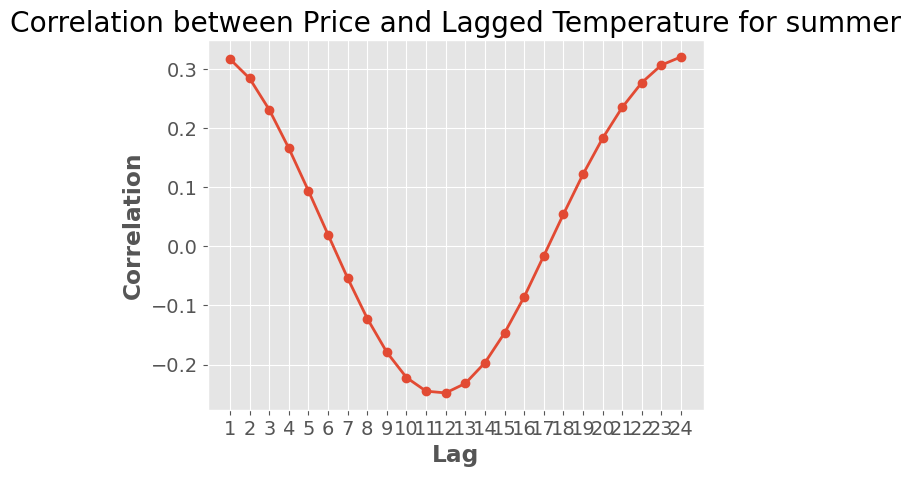

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import spearmanr

val = 25
new_sum_df = summer_df
# Create lagged temperature columns
for i in range(1, val):
    new_sum_df[f'temp_lag_{i}'] = new_sum_df['avg_temp'].shift(i)

# Calculate correlation with different lags
correlations = []
for i in range(1, val):
    corr = new_sum_df['price_x'].corr(new_sum_df[f'temp_lag_{i}'], method='spearman')
    correlations.append(corr)
    
# Plot correlations
plt.plot(range(1, val), correlations, marker='o')
plt.title('Correlation between Price and Lagged Temperature for summer')
plt.xlabel('Lag')
plt.ylabel('Correlation')
plt.xticks(range(1, val))
plt.show()

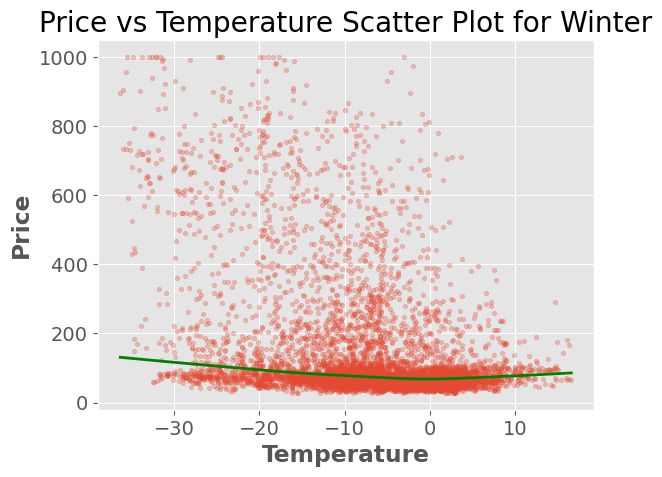

In [ ]:
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Create scatter plot
plt.scatter(winter_df['avg_temp'], winter_df['price'], alpha=0.3, s=10)

# Add axis labels and title
plt.xlabel('Temperature')
plt.ylabel('Price')
plt.title('Price vs Temperature Scatter Plot for Winter')
lowess = sm.nonparametric.lowess(winter_df['price'], winter_df['avg_temp'])
plt.plot(lowess[:, 0], lowess[:, 1], color='green')

# Show plot
plt.show()


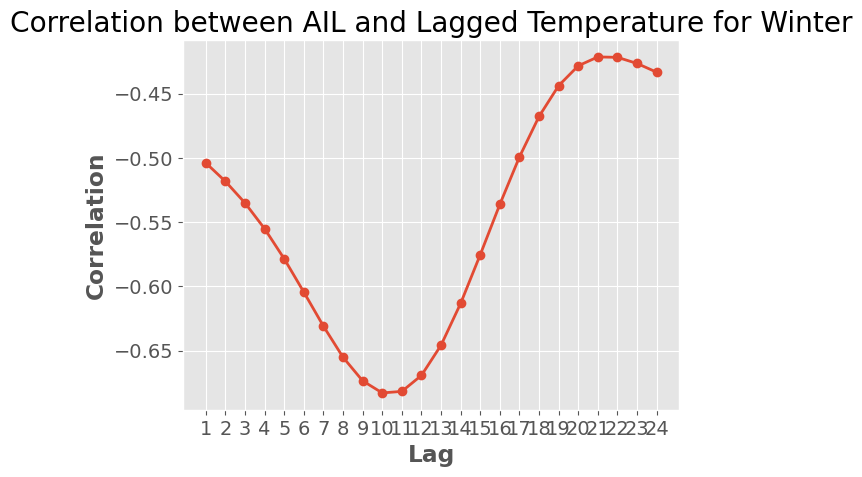

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import spearmanr

val = 25
new_sum_df = winter_df
# Create lagged temperature columns
for i in range(1, val):
    new_sum_df[f'temp_lag_{i}'] = new_sum_df['avg_temp'].shift(i)

# Calculate correlation with different lags
correlations = []
for i in range(1, val):
    corr = new_sum_df['ail_x'].corr(new_sum_df[f'temp_lag_{i}'], method='spearman')
    correlations.append(corr)
    
# Plot correlations
plt.plot(range(1, val), correlations, marker='o')
plt.title('Correlation between AIL and Lagged Temperature for Winter')
plt.xlabel('Lag')
plt.ylabel('Correlation')
plt.xticks(range(1, val))
plt.show()

In [ ]:
winter_df[['ail_x', 'avg_temp', 'temp_lag_1', 'price']].corr(method='spearman').style.background_gradient()

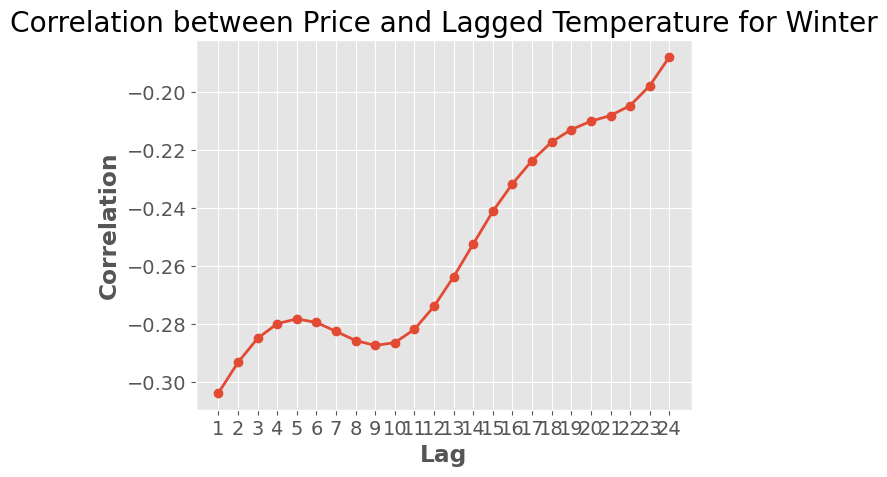

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import spearmanr

val = 25
new_sum_df = winter_df
# Create lagged temperature columns
for i in range(1, val):
    new_sum_df[f'temp_lag_{i}'] = new_sum_df['avg_temp'].shift(i)

# Calculate correlation with different lags
correlations = []
for i in range(1, val):
    corr = new_sum_df['price_x'].corr(new_sum_df[f'temp_lag_{i}'], method='spearman')
    correlations.append(corr)
    
# Plot correlations
plt.plot(range(1, val), correlations, marker='o')
plt.title('Correlation between Price and Lagged Temperature for Winter')
plt.xlabel('Lag')
plt.ylabel('Correlation')
plt.xticks(range(1, val))
plt.show()